In [1]:
import cv2
import pymysql
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

# Connet to database

In [108]:
db = pymysql.connect(host="140.134.27.140", port=5500 ,user="root",passwd="050042",db="Help_Heal_Healthy")
cursor = db.cursor()

# use opencv to get image's rectangle width and height

In [2]:
def getImageRectangleSize(imagePath):
    #read image with grayscale
    image = cv2.imread(imagePath, 0)
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(image,(5,5),0)
    ret, image = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    cnts, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #print(len(cnts))
    
    show = np.zeros((image.shape[0], image.shape[1], 3), np.int8)
    cv2.drawContours(show, cnts, -1, (255, 0, 0), 10)
    maxContour = max(cnts, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(maxContour)
    cv2.rectangle(show, (x, y), (x+w, y+h), (0, 255, 0), 10)

    #show image
    plt.imshow(show)
    plt.axis('off')
    plt.title(imagePath)
    plt.show()
    
    return w, h

90.jpg


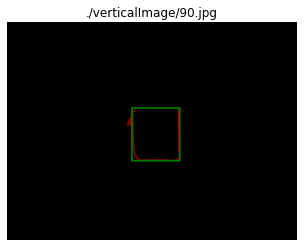

(317, 349)
88.jpg


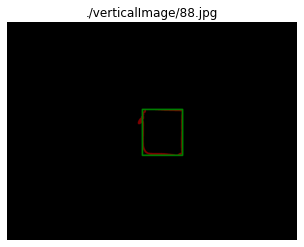

(266, 303)
89.jpg


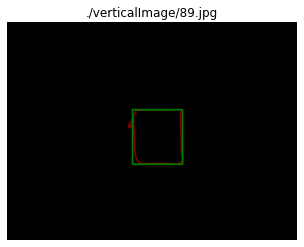

(331, 360)
91.jpg


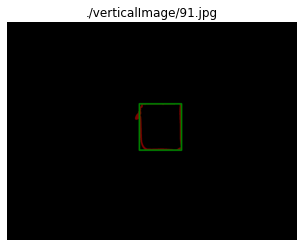

(279, 306)


In [7]:
imageFloder = './verticalImage'
for image in os.listdir(imageFloder):
    print(image)
    print(getImageRectangleSize(imageFloder + "/" + image))

In [45]:
imagePathList = []
#put all image path into imagepathList
for floderPath in os.listdir('./'):
    #only iterrat floder not file
    if('.' not in floderPath):
        for imagePath in os.listdir('./' + floderPath + '/'):
            if('.jpg' in imagePath):#image file name must contain .jpg
                imagePathList.append(floderPath + '/' + imagePath)
print(len(imagePathList))
print(imagePathList)

87
['3_170_120/87.jpg', '3_170_120/86.jpg', '2_200_200/51.jpg', '2_200_200/81.jpg', '2_200_200/54.jpg', '2_200_200/69.jpg', '2_200_200/58.jpg', '2_200_200/60.jpg', '2_200_200/85.jpg', '2_200_200/73.jpg', '2_200_200/56.jpg', '2_200_200/52.jpg', '2_200_200/55.jpg', '2_200_200/68.jpg', '2_200_200/65.jpg', '2_200_200/42.jpg', '2_200_200/70.jpg', '2_200_200/64.jpg', '2_200_200/53.jpg', '2_200_200/84.jpg', '2_200_200/50.jpg', '2_200_200/61.jpg', '2_200_200/43.jpg', '2_200_200/79.jpg', '2_200_200/83.jpg', '2_200_200/72.jpg', '2_200_200/74.jpg', '2_200_200/46.jpg', '2_200_200/57.jpg', '2_200_200/44.jpg', '2_200_200/67.jpg', '2_200_200/63.jpg', '2_200_200/66.jpg', '2_200_200/47.jpg', '2_200_200/77.jpg', '2_200_200/49.jpg', '2_200_200/62.jpg', '2_200_200/80.jpg', '2_200_200/41.jpg', '2_200_200/75.jpg', '2_200_200/71.jpg', '2_200_200/76.jpg', '2_200_200/45.jpg', '2_200_200/78.jpg', '2_200_200/48.jpg', '2_200_200/40.jpg', '2_200_200/59.jpg', '2_200_200/82.jpg', '1_50_50/2.jpg', '1_50_50/1.jpg', '1

In [8]:
def stringSorting(text):
    '''image path like 2_175_65/55.jpg
    2:second object added into database
    175:width 175mm of the real object
    50:height 50mm of the real onject
    55:55th record in the database
    '''
    #split '/' to get image name and then split image name to int sorting
    return [int(text.split('/')[1].split('.jpg')[0]) ]

In [46]:
#sort the image name like number
imagePathList.sort(key=stringSorting)
print(imagePathList)
# print(imagePathList[60].split('_')[1])
# print(imagePathList[60].split('_')[2].split('/')[0])

['1_50_50/1.jpg', '1_50_50/2.jpg', '1_50_50/3.jpg', '1_50_50/4.jpg', '1_50_50/5.jpg', '1_50_50/6.jpg', '1_50_50/7.jpg', '1_50_50/8.jpg', '1_50_50/9.jpg', '1_50_50/10.jpg', '1_50_50/11.jpg', '1_50_50/12.jpg', '1_50_50/13.jpg', '1_50_50/14.jpg', '1_50_50/15.jpg', '1_50_50/16.jpg', '1_50_50/17.jpg', '1_50_50/18.jpg', '1_50_50/19.jpg', '1_50_50/20.jpg', '1_50_50/21.jpg', '1_50_50/22.jpg', '1_50_50/23.jpg', '1_50_50/24.jpg', '1_50_50/25.jpg', '1_50_50/26.jpg', '1_50_50/27.jpg', '1_50_50/28.jpg', '1_50_50/29.jpg', '1_50_50/30.jpg', '1_50_50/31.jpg', '1_50_50/32.jpg', '1_50_50/33.jpg', '1_50_50/34.jpg', '1_50_50/35.jpg', '1_50_50/36.jpg', '1_50_50/37.jpg', '1_50_50/38.jpg', '1_50_50/39.jpg', '2_200_200/40.jpg', '2_200_200/41.jpg', '2_200_200/42.jpg', '2_200_200/43.jpg', '2_200_200/44.jpg', '2_200_200/45.jpg', '2_200_200/46.jpg', '2_200_200/47.jpg', '2_200_200/48.jpg', '2_200_200/49.jpg', '2_200_200/50.jpg', '2_200_200/51.jpg', '2_200_200/52.jpg', '2_200_200/53.jpg', '2_200_200/54.jpg', '2_200

# find  missing image

In [10]:
def getMissingImage(List):
    start, end = List[0], List[-1]
    return sorted(set(range(start, end + 1)).difference(List))

In [43]:
#split out the number from the image path for find the missing vlaue
imageNumList = [int(i.split('/')[1].split('.jpg')[0]) for i in imagePathList]
missingList = getMissingImage(imageNumList)
print(missingList)

[]


# Error image
# 22 23 30 31 32

missing vlaue: ['22', '23', '30', '31', '32']
1_50_50/1.jpg


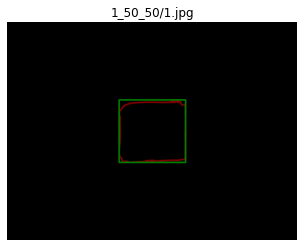

1_50_50/2.jpg


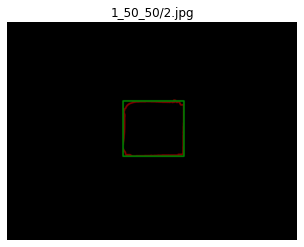

1_50_50/3.jpg


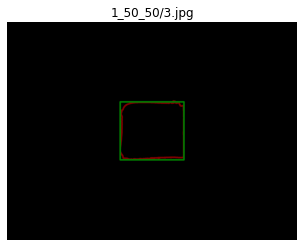

1_50_50/4.jpg


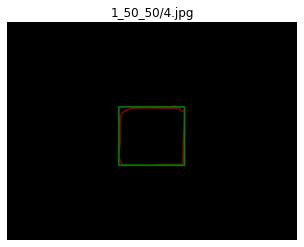

1_50_50/5.jpg


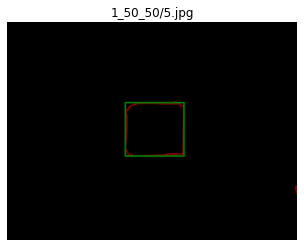

1_50_50/6.jpg


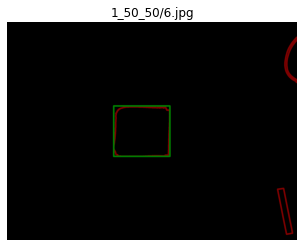

1_50_50/7.jpg


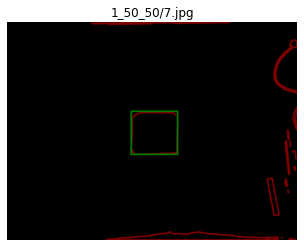

1_50_50/8.jpg


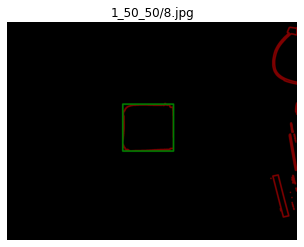

1_50_50/9.jpg


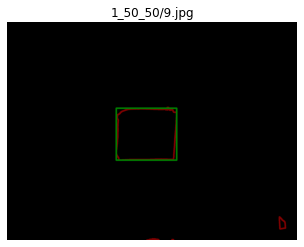

1_50_50/10.jpg


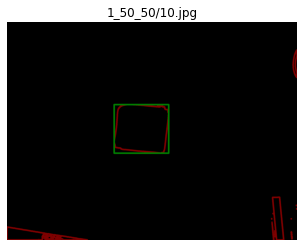

1_50_50/11.jpg


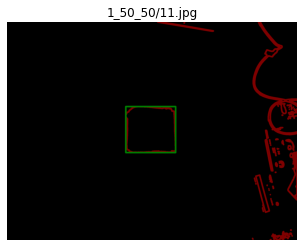

1_50_50/12.jpg


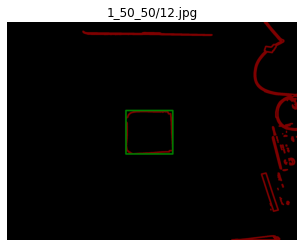

1_50_50/13.jpg


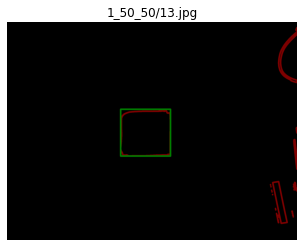

1_50_50/14.jpg


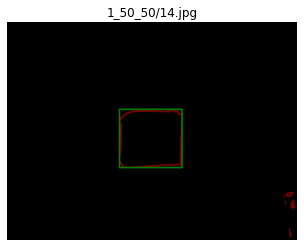

1_50_50/15.jpg


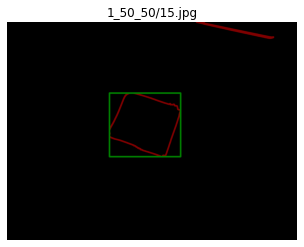

1_50_50/16.jpg


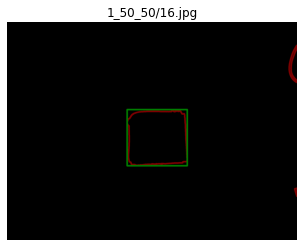

1_50_50/17.jpg


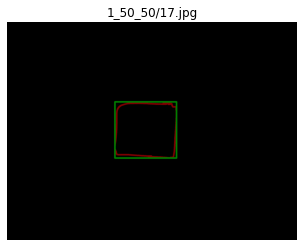

1_50_50/18.jpg


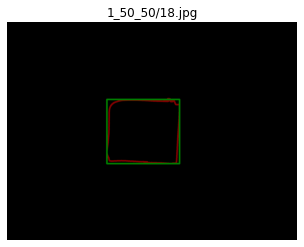

1_50_50/19.jpg


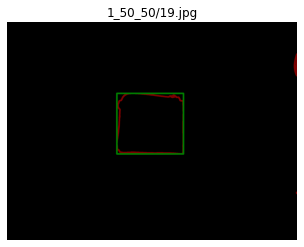

1_50_50/20.jpg


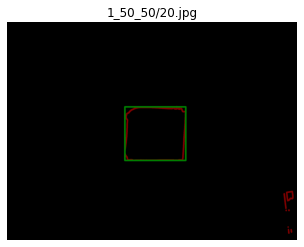

1_50_50/21.jpg


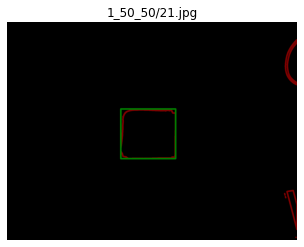

1_50_50/22.jpg
1_50_50/23.jpg
1_50_50/24.jpg


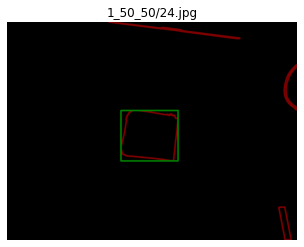

1_50_50/25.jpg


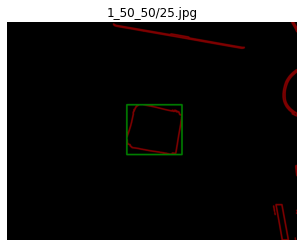

1_50_50/26.jpg


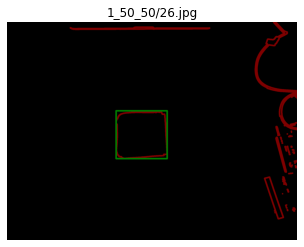

1_50_50/27.jpg


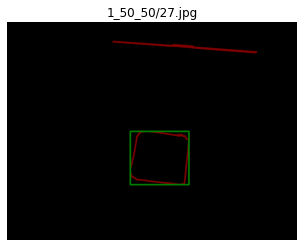

1_50_50/28.jpg


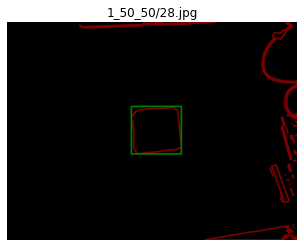

1_50_50/29.jpg


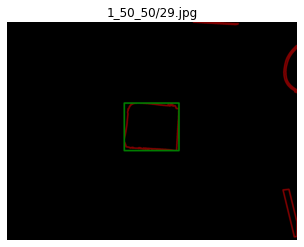

1_50_50/30.jpg
1_50_50/31.jpg
1_50_50/32.jpg
1_50_50/33.jpg


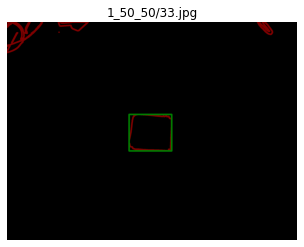

1_50_50/34.jpg


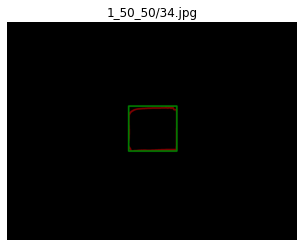

1_50_50/35.jpg


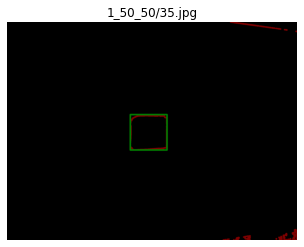

1_50_50/36.jpg


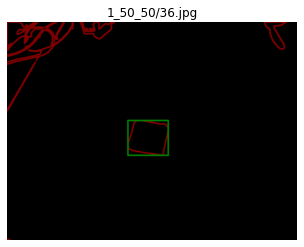

1_50_50/37.jpg


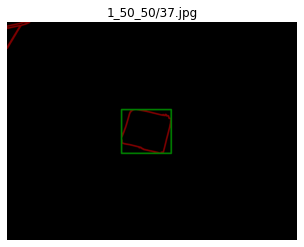

1_50_50/38.jpg


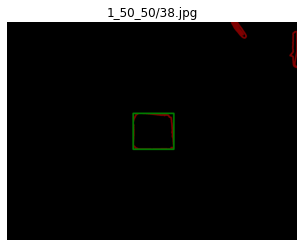

1_50_50/39.jpg


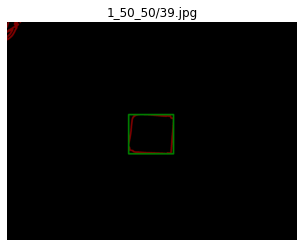

2_200_200/40.jpg


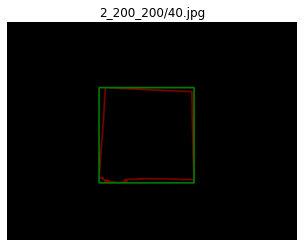

2_200_200/41.jpg


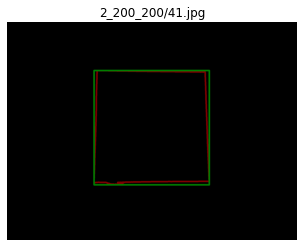

2_200_200/42.jpg


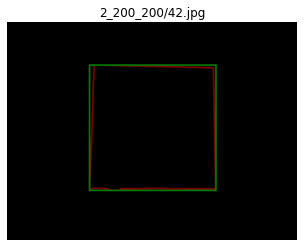

2_200_200/43.jpg


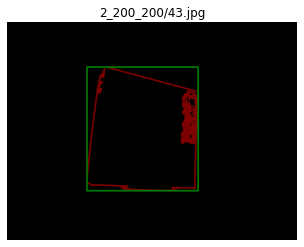

2_200_200/44.jpg


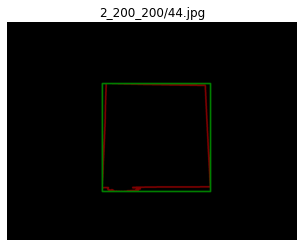

2_200_200/45.jpg


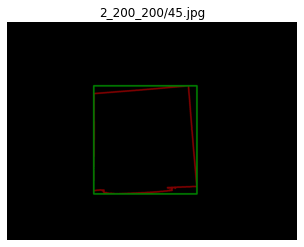

2_200_200/46.jpg


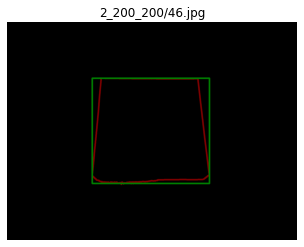

2_200_200/47.jpg


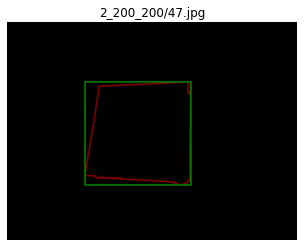

2_200_200/48.jpg


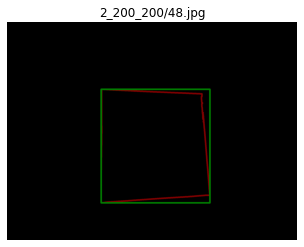

2_200_200/49.jpg


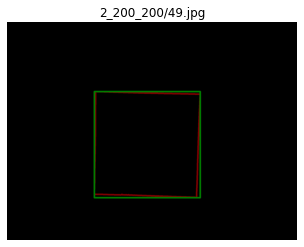

2_200_200/50.jpg


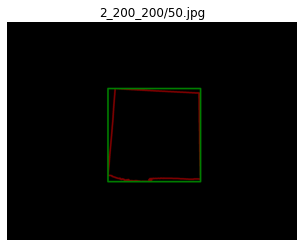

2_200_200/51.jpg


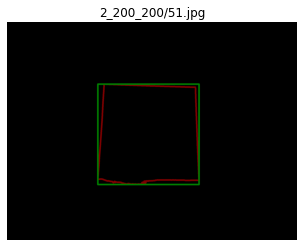

2_200_200/52.jpg


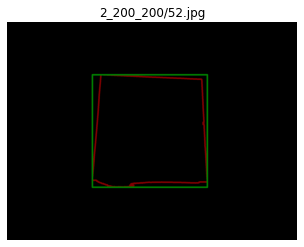

2_200_200/53.jpg


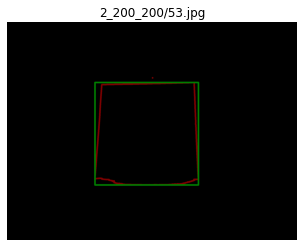

2_200_200/54.jpg


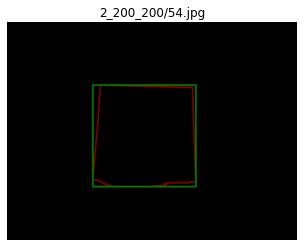

2_200_200/55.jpg


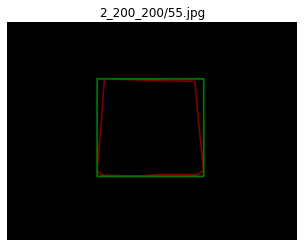

2_200_200/56.jpg


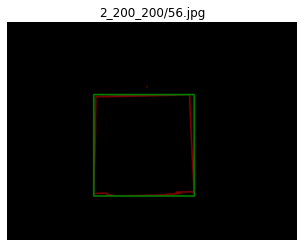

2_200_200/57.jpg


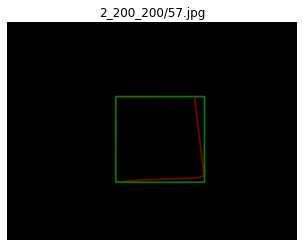

2_200_200/58.jpg


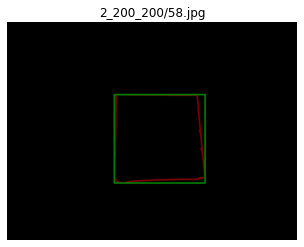

2_200_200/59.jpg


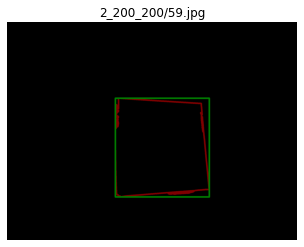

2_200_200/60.jpg


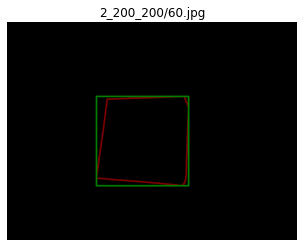

2_200_200/61.jpg


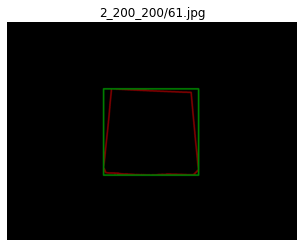

2_200_200/62.jpg


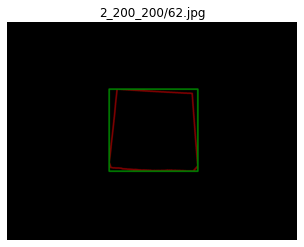

2_200_200/63.jpg


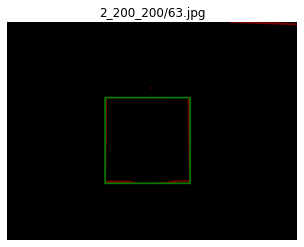

2_200_200/64.jpg


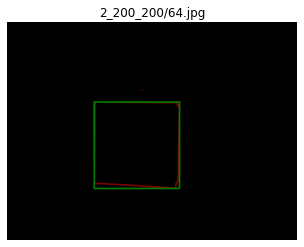

2_200_200/65.jpg


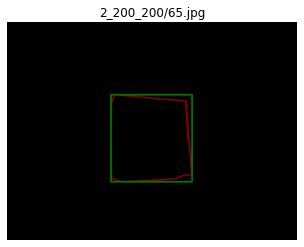

2_200_200/66.jpg


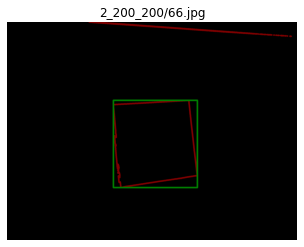

2_200_200/67.jpg


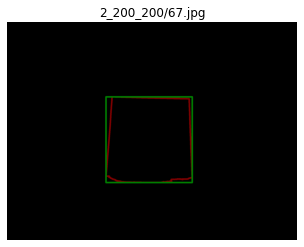

2_200_200/68.jpg


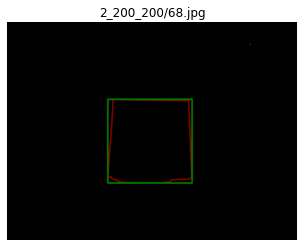

2_200_200/69.jpg


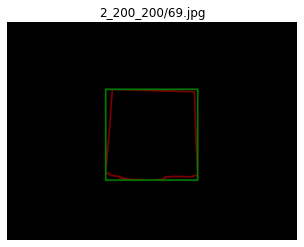

2_200_200/70.jpg


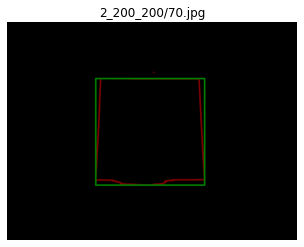

2_200_200/71.jpg


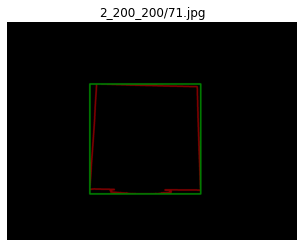

2_200_200/72.jpg


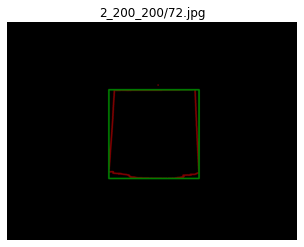

2_200_200/73.jpg


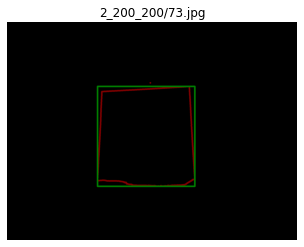

2_200_200/74.jpg


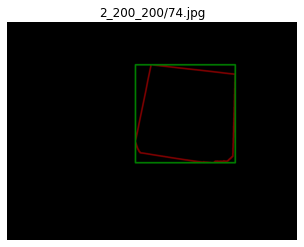

2_200_200/75.jpg


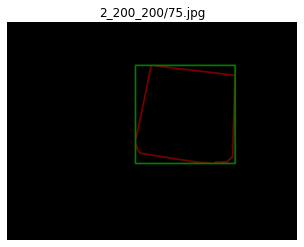

2_200_200/76.jpg


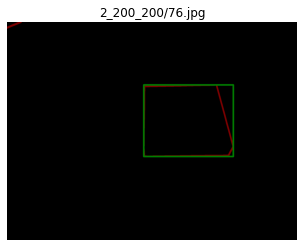

2_200_200/77.jpg


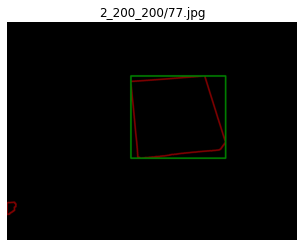

2_200_200/78.jpg


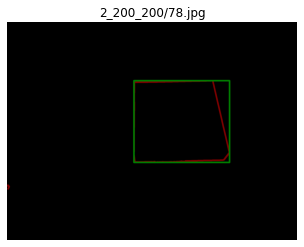

2_200_200/79.jpg


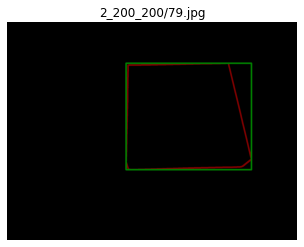

2_200_200/80.jpg


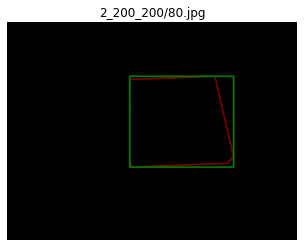

2_200_200/81.jpg


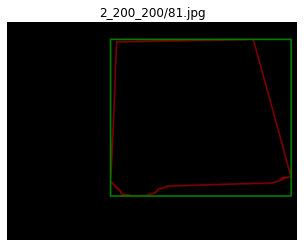

2_200_200/82.jpg


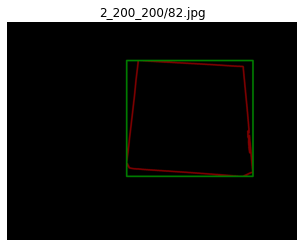

2_200_200/83.jpg


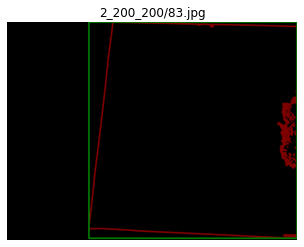

2_200_200/84.jpg


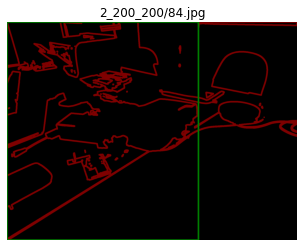

2_200_200/85.jpg


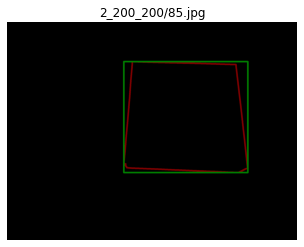

3_170_120/86.jpg


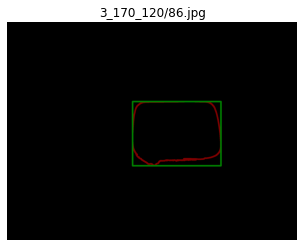

3_170_120/87.jpg


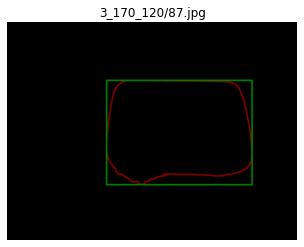

                        x                       y                      z  \
0  -1.5261021852493286000  -1.5647883415222168000  1.1515340805053710000   
1  -1.5261021852493286000  -1.5647883415222168000  1.1515340805053710000   
2  -1.5000506639480590000  -0.6949706077575684000  0.2989265322685241700   
3  -1.5000506639480590000  -0.6949706077575684000  0.2989265322685241700   
4  -1.4213465452194214000  -0.4217635989189148000  0.4028649330139160000   

                distance imageSize realSize  
0  0.3358237445354461700       440       50  
1  0.3358237445354461700       413       50  
2  0.3613862693309784000       403       50  
3  0.3613862693309784000       365       50  
4  0.3618916869163513000       422       50  
164


In [49]:
db = pymysql.connect(host="140.134.27.140", port=5500 ,user="root",passwd="050042",db="Help_Heal_Healthy")
cursor = db.cursor()
#get x, y, z, distabce data from database
cursor.execute('select * from Focal_Detail')
#create a empty dataframe to store data
dataframe = pd.DataFrame(columns=['x', 'y', 'z', 'distance', 'imageSize', 'realSize'])

#split out the number from the image path for find the missing vlaue
imageNumList = [int(i.split('/')[1].split('.jpg')[0]) for i in imagePathList]
missingList = getMissingImage(imageNumList)
#convert elements to string
missingList = [str(i) for i in missingList]
errorImage = ['22', '23', '30', '31', '32', '83', '84'] + missingList#broken image
print('missing vlaue:', errorImage)

for imagePath in imagePathList:
    data= cursor.fetchone()
    x, y, z, distance = data[0], data[2], data[1], data[3]
    print(imagePath)

    if(any(map(imagePath.split('/')[1].__contains__,errorImage))):#skip broken image
        #print('skip')
        continue
    
    wdith, height = getImageRectangleSize(imagePath)
    #spilt width and height into two data
    realWidth = imagePath.split('_')[1]
    realHeight = imagePath.split('_')[2].split('/')[0]
    dataframe = dataframe.append({'x':x, 'y':y, 'z':z, 'distance':distance, 'imageSize':wdith, 'realSize': realWidth}, ignore_index=True)
    dataframe = dataframe.append({'x':x, 'y':y, 'z':z, 'distance':distance, 'imageSize':height, 'realSize': realHeight}, ignore_index=True)
    
cursor.close()

dataframe.reset_index()
print(dataframe.head())
print(len(dataframe))

dataframe.to_csv('distance.csv', index=False)

# database's data fetch test

In [116]:
db = pymysql.connect(host="140.134.27.140", port=5500 ,user="root",passwd="050042",db="Help_Heal_Healthy")
cursor = db.cursor()
#get x, y, z, distabce data from database
cursor.execute('select * from Focal_Detail')
x, y, z, distance = cursor.fetchone()
print(x, y, z, distance)
cursor.close()

-1.5261021852493286000 1.1515340805053710000 -1.5647883415222168000 0.3358237445354461700


# Fit data to regression model

In [4]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
dataFrame = pd.read_csv('distance.csv')
y = dataFrame['realSize'].to_numpy()
x = dataFrame.drop(columns=['realSize']).to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


# print(x.head())
# print(y.head())
# print(x.to_numpy())
print(y)

[ 50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  50  50  50  50  50  50  50  50  50 200 200 200 200
 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 170 120
 170 120]


In [13]:
model = LinearRegression()
x_train = np.array([[0.340451926, 424], [0.429297835, 319],[0.369797379,370], [0.338584363,435],
                   [0.46855852,668],[0.307048589,817],[0.484556645, 642],[0.470655233, 668]])
y_train = np.array([90,90,90,90,200,200,200,200])
model.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print(model.score)
print('Predict:')
x_test = np.array([[0.4653450548648834000, 796], [0.3902771472930908000, 772]])
print(model.predict(x_test))
y_pred = model.predict(x_test)
y_test = np.array([197, 200])

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>
Predict:
[237.85808148 208.70963315]


Coefficients: 
 [2.94935133e+02 2.92011875e-01]
Mean squared error: 872.62
Coefficient of determination: -386.83


ValueError: x and y must be the same size

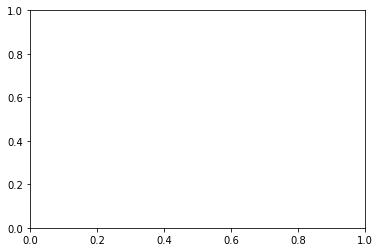

In [23]:
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Try to perdict real object size

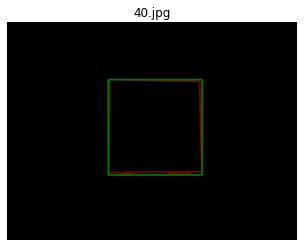

621 630


array([50., 50.])

In [161]:
w, h = getImageRectangleSize('40.jpg')
print(w, h)
testData = np.array(([-1.4401930570602417000, 0.4414618611335754400, -0.8207191824913025000, 0.4843469262123108000, float(w)], 
                    [-1.4401930570602417000, 0.4414618611335754400, -0.8207191824913025000 ,0.4843469262123108000, float(h)]),
                   dtype=np.float)
model.predict(testData)


# 選圖

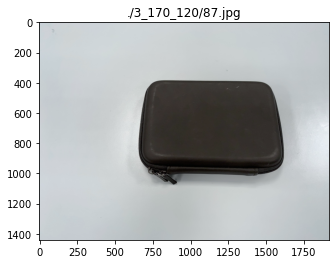

y


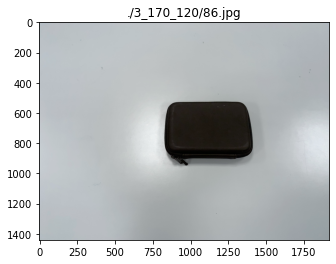

y


NotADirectoryError: [Errno 20] Not a directory: './distance.csv'

In [2]:
import os
import matplotlib.pyplot as plt
import cv2

imageFloder = './'
for floder in os.listdir(imageFloder):
    for imagePath in os.listdir(imageFloder  + floder):
        #print(imageFloder  + floder + '/' + image)
        image = cv2.imread(imageFloder  + floder + '/' + imagePath)
        plt.imshow(image)
        plt.title(imageFloder  + floder + '/' + imagePath)
        plt.show()
        choose = input()
        if(choose == 'y'):
            continue
        else:
            print('delete image')
            os.remove(imageFloder  + floder + '/' + imagePath)